<h1 align="center"> TESI ENEL </h1>
<br>
<center>Neural Networks</center>
<br>
<div style='text-align: right'>09/2019<br> Federico Francone</div>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Colab\ Notebooks  

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


# <center> IMPORTS AND DEF FUNCTIONS

In [ ]:
import pickle
import os
import pandas as pd
import numpy as np
from sklearn  import preprocessing, decomposition
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, KFold
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, make_scorer, roc_curve, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, KFold
from sklearn.model_selection import RandomizedSearchCV, cross_validate

#from utils import *

os.getcwd()

'/content/drive/My Drive/Colab Notebooks'

In [ ]:
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']

""" IMPORTING MODEL
# serialize weights to HDF5
#history.save("history_base_25.h5")
from keras.models import load_model
 
# load model
model = load_model('model.h5')"""

container_25= pd.read_pickle('./Datasets_Enel/new_class_reg/container_25_class.pickle')
container_static= pd.read_pickle('./Datasets_Enel/new_class_reg/container_static_class.pickle')

In [ ]:
""" Li pongo così adesso per le shape, ma non li devo mai usare"""
REMOVE_N_ORDERS= True

scaled_train= container_static['X_train']
scaled_test= container_static['X_test']

if REMOVE_N_ORDERS== True:
    for X in ['X_train', 'X_test']:
        if 'num_orders' in container_25[X].columns:
          container_25[X].drop('num_orders', axis=1, inplace=True)
        
scaled_train_25= container_25['X_train']
scaled_test_25= container_25['X_test']

#(35593, 13) (4854, 13) (29734, 17) (4030, 17)
print('Shapes Static and Rolling25', scaled_train.shape, scaled_test.shape, scaled_train_25.shape, scaled_test_25.shape)  #(42644, 13) (5816, 13) (35663, 17) (4845, 17)

Shapes Static and Rolling25 (34379, 13) (6068, 13) (28732, 17) (5032, 17)


In [ ]:
for cont in [container_static, container_25]:
    for y in ['ytrain', 'ytest']:
        cont[y]= cont[y].map({0:0, 1:0, 2:2})
        print(cont[y].nunique()) #apposto
        
ytrain= container_static['ytrain']
ytest= container_static['ytest']
ytrain_25= container_25['ytrain']
ytest_25= container_25['ytest']

print('Shapes Target Static and Rolling25', ytrain.shape, ytest.shape, ytrain_25.shape, ytest_25.shape)

2
2
2
2
Shapes Target Static and Rolling25 (34379,) (6068,) (28732,) (5032,)


In [ ]:
import pickle
import os
import pandas as pd
import numpy as np
from sklearn  import preprocessing, decomposition
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, KFold
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, make_scorer, roc_curve, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, KFold
from sklearn.model_selection import RandomizedSearchCV, cross_validate

from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import*
import time

#from utils import *

os.getcwd()

'/content/drive/My Drive/Colab Notebooks'

In [ ]:
from sklearn import datasets, linear_model
from keras import regularizers
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

lr= 0.001
adam= optimizers.Adam(lr= lr)

"""ytrain_25_hot= to_categorical(container_25['ytrain'], num_classes=2)
ytest_25_hot= to_categorical(container_25['ytest'], num_classes=2)

ytrain_stat_hot= to_categorical(container_static['ytrain'], num_classes=2)
ytest_stat_hot= to_categorical(container_static['ytest'], num_classes=2)"""

"ytrain_25_hot= to_categorical(container_25['ytrain'], num_classes=2)\nytest_25_hot= to_categorical(container_25['ytest'], num_classes=2)\n\nytrain_stat_hot= to_categorical(container_static['ytrain'], num_classes=2)\nytest_stat_hot= to_categorical(container_static['ytest'], num_classes=2)"

In [ ]:
def container_modello(caso):
    """Return un diz con chiavi X_train, X_test, y_train, y_test, best_estimator
    caso: 'statico', 'rolling25', 'rolling25' """
    
    if caso== 'statico':
        X_train= container_static['X_train']
        X_test= container_static['X_test']
        y_train= container_static['ytrain']
        y_test= container_static['ytest']
        try:
            best_est= container_static['best_estimator']
        except:
            pass
        #best_est= best_static_rf
        #feat_imp= feats_imp_static
        
    elif caso== 'rolling25':
        X_train= container_25['X_train']
        X_test= container_25['X_test']
        y_train= container_25['ytrain']
        y_test= container_25['ytest']
        try:
            best_est= container_25['best_estimator']
        except:
            pass
        #best_est= best_25_rf
        #feat_imp= feats_imp_rf25
        
    return {'X_train': X_train, 'X_test': X_test, 'ytrain': y_train, 'ytest': y_test} #, 'best_estimator': best_est,
           #'feat_imp': feats_imp_rf25}


def summary_classifier(classifier, x_train, y_train, y_test, predictions):
    
    #posso predire scaled_test, quello con tutte le 369 feauters: lui da solo ne toglierà alcune con lasso, è gia incorporato
    print('\n\033[1mtrain accuracy TP+TN/tot is {} \033[0m'.format(round(accuracy_score(y_train, classifier.predict(x_train)),3)))
    print('\033[1mtest accuracy TP+TN/tot is {} \033[0m'.format(round(accuracy_score(y_test, predictions),3)))
    #print("cross validation accuracy sul train è: ", cross_val_score(estimator = grid_fit.best_estimator_, X = scaled_train, y = Y_train, cv = 10).mean())
    print('\n\033[1mCLASSIFICATION REPORT\033[0m: \n', classification_report(y_test, predictions))
    print('\033[1mCONFUSION MATRIX\033[0m \n', confusion_matrix(y_test, predictions))
    #"""ROC CURVE SCORES (non esiste per multiclass classification)"""
    #print('roc curve train is {a}, roc test is {b}'.format(a= roc_auc_score(y_train, classifier.predict(x_train), average="weighted"), b= roc_auc_score(y_test, predictions, average="weighted")))
    print('\n\033[1mF1 train is {a}, F1 test is {b} \033[0m'.format(a= round(f1_score(y_train, classifier.predict(x_train), 
                                                                average='weighted'),3), b= round(f1_score(y_test, predictions, average='weighted'),3)))
    
def summary_grid(grid_fit, scaled_train, Y_train, scaled_test, Y_test):
    """ AFTER A GRIDSEARCH, I CONSIDER RELEVANT ANALYZING THE FOLLOWING SCORES
    NB: Per accuracy il Train è tutto l'80%, senza split con validation, e test sul 20%. Per F1-weighted invece validation score, l ultimo,
    è valutato come media dello score sulle K folds (5) del train, quindi su 80%/5..."""
    
    print('best param combination: ', grid_fit.best_params_)   #'C': 0.357
    #print('best estimator: ', grid_fit.best_estimator_)
    #print('predictions', grid_fit.predict(scaled_test))
    
    #posso predire scaled_test, quello con tutte le 369 feauters: lui da solo ne toglierà alcune con lasso, è gia incorporato
    print('\n\033[1m Train Accuracy is {}\033[0m'.format(round(accuracy_score(Y_train, grid_fit.predict(scaled_train)),3)))
    print('\033[1m Test Accuracy is {}\033[0m'.format(round(accuracy_score(Y_test, grid_fit.predict(scaled_test)),3)), '\033[0m')
    #print("\033[1mcross validation accuracy sul train è: ", round(cross_val_score(estimator = grid_fit.best_estimator_, X = scaled_train, y = Y_train, cv = 5).mean(),3), '\033[0m')
    print('\n\033[1mCLASSIFICATION REPORT\033[0m: \n', classification_report(Y_test, grid_fit.best_estimator_.predict(scaled_test)))
    print('\033[1mCONFUSION MATRIX\033[0m \n', confusion_matrix(Y_test, grid_fit.best_estimator_.predict(scaled_test)))
    #"""ROC CURVE SCORES (non esiste per multiclass classification)"""
    #print('roc curve train is {a}, roc test is {b}'.format(a= roc_auc_score(Y_train, grid_fit.predict(scaled_train)), b= roc_auc_score(Y_test, grid_fit.predict(scaled_test))))
    print('\n\033[1mF1 TRAIN: {a}, \nVALIDATION F1 (averaged on 5 folds): {b} \033[0m \n\033[1mF1 TEST: {c}\033[0m'.format(
        a= round(f1_score(Y_train, grid_fit.predict(scaled_train), average='weighted' ),3), 
        b= round(grid_fit.best_score_,3), #data combinazione parametri, è score medio (qui F1, vedi run_model) valutato sulle K cross validation. quindi è sempre una validation performance (nel mio caso f1 weighted)
        c= round(f1_score(Y_test, grid_fit.predict(scaled_test), average='weighted'),3)))   

In [ ]:
def df_cv_results(grid_fit, n_to_show= 5):
    df= pd.DataFrame(grid_fit.cv_results_)
    df= df[[col for col in df.columns if 'param_' in col]+['mean_test_score', 'mean_train_score']]
    return df.sort_values(by= 'mean_test_score', ascending= False).head(n_to_show)

def after_nn(grid, show_df= False, n_to_show= 5):
  print('best_score and best params:', grid.best_score_, grid.best_params_)
  results= df_cv_results(grid)
  return results.head(n_to_show)

In [ ]:
def run_model(estimator, caso, param_grid= None, random= False, verbose=2, cv=3, n_jobs= None,
              return_single_mod= True, return_results=True, n_to_show=5, early= None): #param_grid= None
    """estimator è il modello, caso puo essere: ['statico', 'rolling75', 'rolling25']. \n
    Return Grid Search estimator. """
    
    diz= container_modello(caso)
    
    X_train= diz['X_train']
    X_test= diz['X_test']
    ytrain= diz['ytrain']
    ytest= diz['ytest']
    
    print('Shape di X_train e X_test sono: ', X_train.shape, X_test.shape)
    temp=time.time()
    
    if param_grid is None:
        if early is None:
          history= estimator.fit(X_train, ytrain, validation_split= 0.2)
        else:
          history= estimator.fit(X_train, ytrain, validation_split= 0.2, callbacks= [early])
        #plot_model_history(estimator)
        preds= estimator.predict(X_test)
        
        summary_classifier(estimator, X_train, ytrain, ytest, preds)
        print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())

        if return_single_mod==True:
            return history
    
    else:
        if random== False:
          Grid_RF = GridSearchCV(estimator, param_grid, scoring='f1_weighted', cv=cv, return_train_score=True, 
                                   n_jobs= n_jobs, verbose= verbose)
          if early is None:
            Grid_RF.fit(X_train, ytrain)
          else:
            Grid_RF.fit(X_train, ytrain, callbacks= [early])
            
            print('\n It is not a single model but a Grid Search \n')
            summary_grid(Grid_RF, X_train, ytrain, X_test, ytest)  
            print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())
            if return_results==True:
              print(df_cv_results(Grid_RF, n_to_show))
        
        elif random== True:
            Grid_RF = RandomizedSearchCV(estimator, param_distributions=param_grid, 
                                         scoring='f1_weighted', cv=cv, return_train_score=True, verbose= verbose, n_jobs= n_jobs)
            if early is None:
              Grid_RF.fit(X_train, ytrain)
            else:
              Grid_RF.fit(X_train, ytrain, callbacks= [early])
            print('\n It is not a single model but a (Randomized) Grid Search \n')
            summary_grid(Grid_RF, X_train, ytrain, X_test, ytest)
            print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())
            if return_results==True:
              print(df_cv_results(Grid_RF, n_to_show))
        return  Grid_RF 

In [ ]:
def history_direct(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history.history['acc'])+1),model_history.history.history['acc'])
    axs[0].plot(range(1,len(model_history.history.history['val_acc'])+1),model_history.history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history.history['acc'])+1),len(model_history.history.history['val_acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history.history['loss'])+1),model_history.history.history['loss'])
    axs[1].plot(range(1,len(model_history.history.history['val_loss'])+1),model_history.history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history.history['loss'])+1),len(model_history.history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['val_acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

def baseline_one_hidden(nodi_hidden= 15):
    # create model
    model = Sequential()
    model.add(Dense(nodi_hidden, input_dim=len(container_25['X_train'].columns), activation='relu'))
    model.add(Dense(1, activation= 'sigmoid'))  
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  #se piu categorie metto categorical_crossentropy
    return model
  
def baseline_two_hiddens(nodi_hidden1= 20, nodi_hidden2= 10 ):
    # create model
    model = Sequential()
    model.add(Dense(nodi_hidden1, input_dim=len(container_25['X_train'].columns), activation='relu'))
    model.add(Dense(nodi_hidden2, activation='relu'))
    model.add(Dense(1, activation= 'sigmoid'))  
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  #se piu categorie metto categorical_crossentropy
    return model

# <center> NEURAL NETWORKS

In [ ]:
early = EarlyStopping(monitor='val_acc', mode='max', verbose=5, patience=7, min_delta= 0.003)  # Voglio 0.3% di miglioramento in 7 iterazioni

nn_base_25_one = KerasClassifier(build_fn=baseline_one_hidden, epochs=50, batch_size=32, verbose=2)

In [ ]:
history_one= run_model(nn_base_25_one, 'rolling25', verbose=2, early= early)

Shape di X_train e X_test sono:  (28732, 17) (5032, 17)
Train on 22985 samples, validate on 5747 samples
Epoch 1/50
 - 5s - loss: 0.6208 - acc: 0.6543 - val_loss: 0.5648 - val_acc: 0.7131
Epoch 2/50
 - 3s - loss: 0.5576 - acc: 0.7085 - val_loss: 0.5478 - val_acc: 0.7232
Epoch 3/50
 - 3s - loss: 0.5479 - acc: 0.7140 - val_loss: 0.5408 - val_acc: 0.7246
Epoch 4/50
 - 3s - loss: 0.5428 - acc: 0.7160 - val_loss: 0.5390 - val_acc: 0.7282
Epoch 5/50
 - 3s - loss: 0.5381 - acc: 0.7190 - val_loss: 0.5337 - val_acc: 0.7280
Epoch 6/50
 - 3s - loss: 0.5368 - acc: 0.7216 - val_loss: 0.5364 - val_acc: 0.7287
Epoch 7/50
 - 4s - loss: 0.5333 - acc: 0.7221 - val_loss: 0.5277 - val_acc: 0.7289
Epoch 8/50
 - 4s - loss: 0.5333 - acc: 0.7233 - val_loss: 0.5287 - val_acc: 0.7303
Epoch 9/50
 - 3s - loss: 0.5311 - acc: 0.7246 - val_loss: 0.5303 - val_acc: 0.7296
Epoch 10/50
 - 3s - loss: 0.5295 - acc: 0.7278 - val_loss: 0.5234 - val_acc: 0.7313
Epoch 11/50
 - 3s - loss: 0.5294 - acc: 0.7259 - val_loss: 0.523

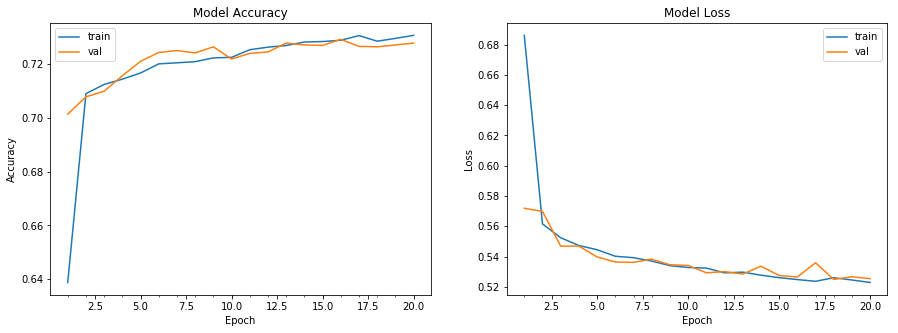

In [ ]:
plot_model_history(history_one)

In [ ]:
###############################################################################################################################

## Risolvi problema Evaluate

In [ ]:
model_1h= baseline_one_hidden()

early = EarlyStopping(monitor='val_acc', mode='max', verbose=5, patience=7, min_delta= 0.003)  # Voglio 0.3% di miglioramento in 7 iterazioni

In [ ]:
""" Facendo secco model.fit, senza KerasClassifier wrapper, va molto peggio....bah"""

model_1h.fit(container_25['X_train'], container_25['ytrain'], validation_split= 0.2, callbacks= [early], epochs=50, batch_size=32, verbose=2)
print('With Evaluate: ' , model_1h.evaluate(container_25['X_test'], container_25['ytest']))

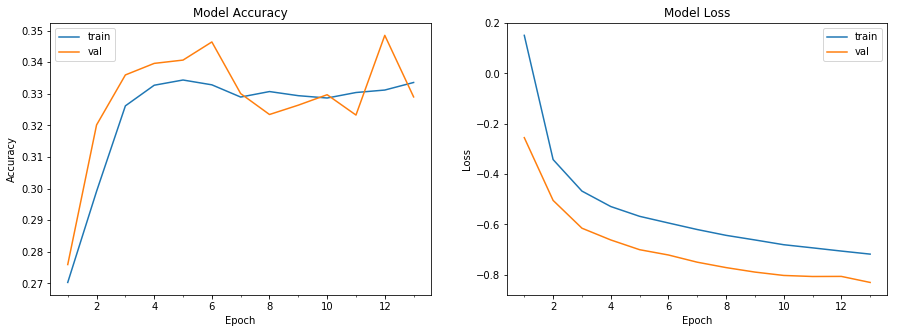

In [ ]:
history_direct(model_1h)

In [ ]:
nn_base_25_one = KerasClassifier(build_fn=baseline_one_hidden, epochs=5, batch_size=32, verbose=0)

nn_base_25_one.fit(container_25['X_train'], container_25['ytrain'], validation_split= 0.2, callbacks= [early], epochs=50, batch_size=32, verbose=1)

In [ ]:
summary_classifier(nn_base_25_one, container_25['X_train'], container_25['ytrain'],container_25['ytest'], preds)

In [ ]:
prova= pd.DataFrame(nn_base_25_one.predict(container_25['X_test']))
prova['proba']= nn_base_25_one.model.predict(container_25['X_test'])
prova['label']= container_25['ytest'].values

prova.columns= ['pred', 'proba', 'label']
prova.head()

,pred,proba,label
0,2,0.621131,0
1,2,0.749300,2
2,0,0.231038,0
3,0,0.261556,0
4,0,0.267359,0


In [ ]:
accuracy_score(container_25['ytrain'], nn_base_25_one.predict(container_25['X_train']))

0.7268202700821383

In [ ]:
prova[prova.pred== prova.label].shape[0]/ prova.shape[0]  #accuracy su test set

0.7325119236883942

In [ ]:
accuracy_score(container_25['ytest'], preds )

0.7325119236883942

In [ ]:
#nn_base_25_one.model.metrics_names

In [ ]:
"""keras.metrics.binary_accuracy(labels, predLabels)
keras.metrics.categorical_accuracy(labels, predLabels)
keras.metrics.sparse_categorical_accuracy(labels, predLabels)"""

In [ ]:
print('With Evaluate: ' , nn_base_25_one.model.evaluate(container_25['X_train'], container_25['ytrain']))

28732/28732 [==============================] - 2s 54us/step
With Evaluate:  [0.5459841443571924, 0.5556522344590296]


In [ ]:
################################################ Drawing Separation at Layer ###############################################################################

In [ ]:
import keras.backend as K

inp = history_one.model.layers[0].input
out = history_one.model.layers[0].output

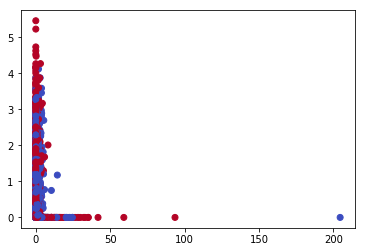

In [ ]:
features_function = K.function([inp], [out])
features = features_function([container_25['X_test']])[0]

plt.scatter(features[:, 0], features[:, 1], c= ytest_25, cmap='coolwarm')

In [ ]:
model= baseline_two_hiddens()
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

5032/5032 [==============================] - 0s 63us/step


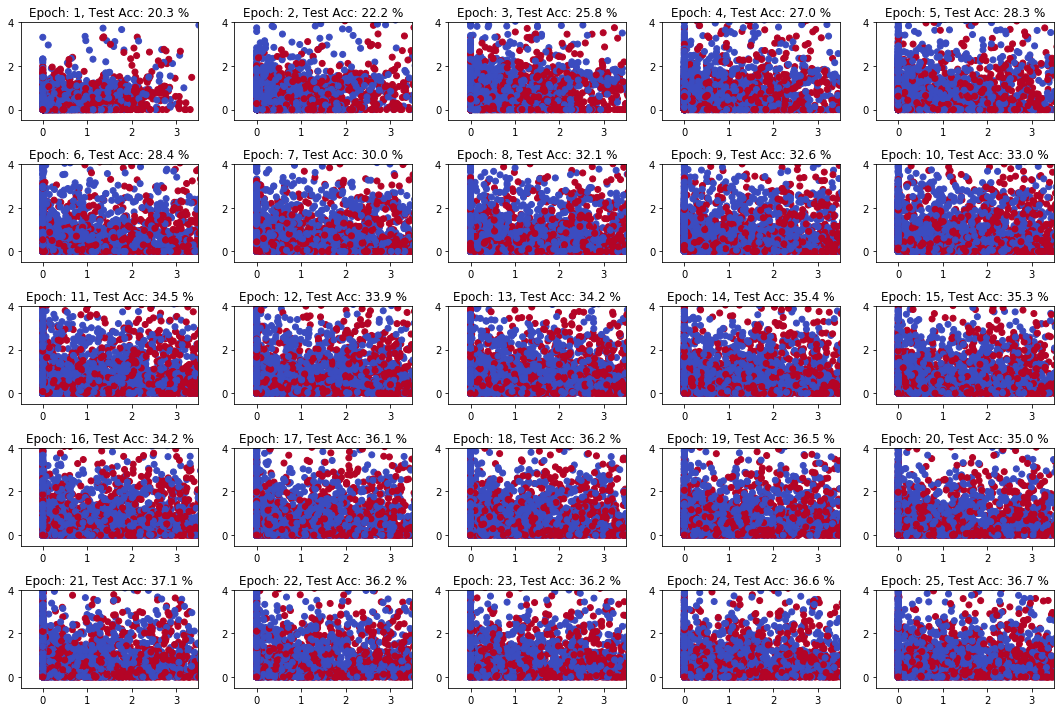

In [ ]:
plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(scaled_train_25, ytrain_25, batch_size=1024, epochs=1, verbose=0)
    test_accuracy = model.evaluate(scaled_test_25, ytest_25)[1]
    features = features_function([scaled_test_25])[0]
    plt.scatter(features[:, 0], features[:, 1], c=ytest_25, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

In [ ]:
####################################################################################

## Fine problema Evaluate

In [ ]:
early = EarlyStopping(monitor='val_acc', mode='max', verbose=5, patience=10, min_delta= 0.001)  # Voglio 0.3% di miglioramento in 7 iterazioni

nn_base_25_two = KerasClassifier(build_fn=baseline_two_hiddens, epochs=80, batch_size=32, verbose=2)

history_two= run_model(nn_base_25_two, 'rolling25', verbose=2, early= early)

Shape di X_train e X_test sono:  (28732, 17) (5032, 17)
Train on 22985 samples, validate on 5747 samples
Epoch 1/80
 - 4s - loss: 0.6059 - acc: 0.6827 - val_loss: 0.5604 - val_acc: 0.7129
Epoch 2/80
 - 3s - loss: 0.5534 - acc: 0.7128 - val_loss: 0.5403 - val_acc: 0.7195
Epoch 3/80
 - 3s - loss: 0.5422 - acc: 0.7184 - val_loss: 0.5355 - val_acc: 0.7256
Epoch 4/80
 - 3s - loss: 0.5364 - acc: 0.7233 - val_loss: 0.5294 - val_acc: 0.7291
Epoch 5/80
 - 3s - loss: 0.5334 - acc: 0.7245 - val_loss: 0.5271 - val_acc: 0.7286
Epoch 6/80
 - 3s - loss: 0.5305 - acc: 0.7243 - val_loss: 0.5472 - val_acc: 0.7239
Epoch 7/80
 - 3s - loss: 0.5277 - acc: 0.7264 - val_loss: 0.5238 - val_acc: 0.7277
Epoch 8/80
 - 3s - loss: 0.5261 - acc: 0.7283 - val_loss: 0.5225 - val_acc: 0.7279
Epoch 9/80
 - 3s - loss: 0.5250 - acc: 0.7274 - val_loss: 0.5348 - val_acc: 0.7249
Epoch 10/80
 - 3s - loss: 0.5233 - acc: 0.7286 - val_loss: 0.5313 - val_acc: 0.7259
Epoch 11/80
 - 3s - loss: 0.5221 - acc: 0.7288 - val_loss: 0.523

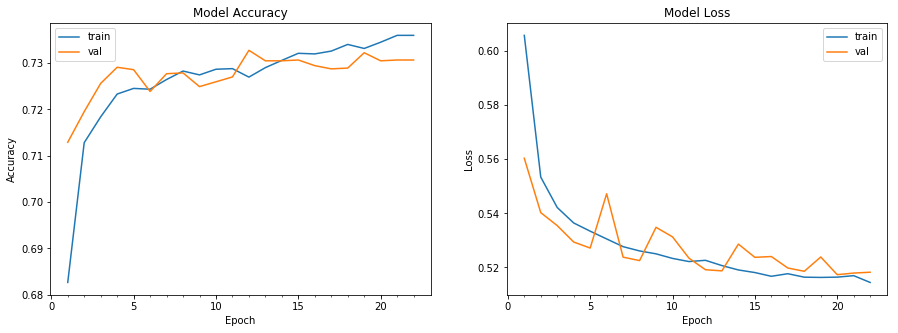

In [ ]:
plot_model_history(history_two)

**Accuracy seems to grow fast in the first 4 epochs, then it does not improve regularly. With too many epochs we would be in overfitting**

**I obtained 74% of accuracy on the test set with this simple Dense Neural Network**

# <center> <font color = 'orange'> GRIDSEARCH varie per avere un'idea della miglior struttura della rete

In [ ]:
container_25['X_train'].sample(2)

,Header amount,std_order_intervals,days_til_last_order,durata_nominale_gg,percentage_used,ordini/mese,VMD Code_FINAL_ENC,QMG Code_FINAL_ENC,Global Business line_FINAL_ENC,Geographical Area_FINAL_ENC,Supplier Type Code_FINAL_ENC,Purchase document type_FINAL_ENC,Job type_FINAL_ENC,Professional services flag_FINAL_ENC,Main material group qualification flag_FINAL_ENC,Contract Type_FINAL_ENC,Variant code_FINAL_ENC
2229,0.043632,0.810219,0.728972,0.722581,1.641389,0.282353,2.272257,0.181533,0.590429,4.310020,0.474568,-0.212927,-0.352366,1.986300,-0.457141,-0.386859,0.276202
39474,-0.264249,-0.072993,-0.214953,-0.873118,-0.218418,-0.258824,0.040690,1.150165,1.248624,-0.245884,1.010518,1.214735,0.410465,-0.466616,-1.310650,0.280689,-0.908060


In [ ]:
container_25['X_train'].shape #Ho 17 colonne

(28732, 17)

# <center>One Hidden Layer

In [ ]:
def baseline_one_hidden(nodi_hidden= 15, with_dropout=True, dropout= 0.2):
    # create model
    model = Sequential()
    model.add(Dense(nodi_hidden, input_dim=len(container_25['X_train'].columns), activation='relu'))
    if with_dropout==True:
      model.add(Dropout(rate= dropout))
    model.add(Dense(1, activation='sigmoid'))   #anche softmax va bene, ma sigmoid dà molta più accuratezza. Penso perchè sigmoid è caso binario, softmax più classi
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  #se piu categorie metto categorical_crossentropy
    return model

In [ ]:
""" UN GIRO SOLO CON CROSS VALIDATION E EARLY STOPPING: PER OGNI CV, MI FERMO QUANDO NON MIGLIORO ALMENO DEL 5% IN 5 EPOCHE...GIUSTO PER RISPARMIARE COMPUTAZIONI
https://stackoverflow.com/questions/42492824/can-i-send-callbacks-to-a-kerasclassifier --> Early Stopping ok, ma Checkpoint in grid search non ha senso: mi salva solo il modello migliore dell'ultima fold"""

early = EarlyStopping(monitor='acc', mode='max', verbose=5, patience=7, min_delta= 0.001)  # Voglio 0.1% di miglioramento in 7 iterazioni

nn_base_25_one = KerasClassifier(build_fn=baseline_one_hidden, epochs=50, batch_size=32, verbose=2)

In [ ]:
param_grid = dict(
        nodi_hidden= [50, 100],
        epochs= [80],
        batch_size= [32],
        dropout= [0.5, 0.0] )  #5% di prob di droppare un link

history_one= run_model(nn_base_25_one, 'rolling25', param_grid= param_grid, verbose=2, early= early)

In [ ]:
df_cv_results(history_one)

,param_batch_size,param_dropout,param_epochs,param_nodi_hidden,mean_test_score,mean_train_score
2,32,0,80,50,0.722659,0.744065
1,32,0.5,80,100,0.722653,0.733456
3,32,0,80,100,0.721641,0.758360
0,32,0.5,80,50,0.712754,0.716906


### <center> Dropout lo scelgo piccolo: ho ancora margine per aggiungere nodi

In [ ]:
param_grid = dict(
        nodi_hidden= [128, 256],
        epochs= [80],
        batch_size= [64, 128],
        dropout= [0.2, 0.5])  

"""Train Accuracy is 0.754
 Test Accuracy is 0.747 
 
F1 TRAIN: 0.745, 
VALIDATION F1 (averaged on 5 folds): 0.729  
F1 TEST: 0.735"""

history_one= run_model(nn_base_25_one, 'rolling25', param_grid= param_grid, verbose=5, early= early)

In [ ]:
################################### Riprovo con 1 hidden, aumentando ancora nodi ####################################

In [ ]:
param_grid = dict(
        nodi_hidden= [512],
        epochs= [80],
        batch_size= [128, 256],
        dropout= [0.2, 0.5])  

history_one_2= run_model(nn_base_25_one, 'rolling25', param_grid= param_grid, verbose=5, early= early)

In [ ]:
################################### Riprovo con 1 hidden, aumentando nodi ####################################

In [ ]:
param_grid = dict(
        nodi_hidden= [512, 1024],
        epochs= [80],
        batch_size= [256, 512],
        dropout= [0.3, 0.6])  

history_one_3= run_model(nn_base_25_one, 'rolling25', param_grid= param_grid, verbose=5, early= early)

In [ ]:
#####################################################################################################################################

# <center>Three Hidden Layers

In [ ]:
def baseline_three_hiddens(nodi_hidden1= 20, nodi_hidden2= 10, nodi_hidden3= 5, with_dropout=True, dropout= 0.2):
    # create model
    model = Sequential()
    model.add(Dense(nodi_hidden1, input_dim=len(container_25['X_train'].columns), activation='relu'))
    if with_dropout==True:
      model.add(Dropout(rate= dropout))
    model.add(Dense(nodi_hidden2, activation='relu'))
    if with_dropout==True:
      model.add(Dropout(rate= dropout))
    model.add(Dense(nodi_hidden3, activation='relu'))
    if with_dropout==True:
      model.add(Dropout(rate= dropout))
    model.add(Dense(1, activation='sigmoid'))   #anche softmax va bene, ma sigmoid dà molta più accuratezza. Penso perchè sigmoid è caso binario, softmax più classi
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  #se piu categorie metto categorical_crossentropy
    return model

In [ ]:
early = EarlyStopping(monitor='acc', mode='max', verbose=2, patience=7, baseline=0.6, min_delta= 0.001)  # 0.1% di miglioramento in 7 steps
 
param_grid = dict(
        nodi_hidden1= [128, 256],
        nodi_hidden2= [64 ],
        nodi_hidden3= [8,16,32],
        epochs= [80],
        batch_size= [64, 128],
        dropout= [0.3, 0.6] 
            ) 

nn_25_three = KerasClassifier(build_fn=baseline_three_hiddens, verbose=2,)
grid_NN_25_three = run_model(nn_25_three , 'rolling25', param_grid= param_grid, verbose=5, early= early, return_results= True)

In [ ]:
grid_NN_25_three.best_score_, grid_NN_25_three.best_params_

(0.7258340081079322,
 {'batch_size': 64,
  'dropout': 0.3,
  'epochs': 80,
  'nodi_hidden1': 128,
  'nodi_hidden2': 32,
  'nodi_hidden3': 8})

In [ ]:
results_3h_1run= df_cv_results(grid_NN_25_three)
results_3h_1run.head()

,param_batch_size,param_dropout,param_epochs,param_nodi_hidden1,param_nodi_hidden2,param_nodi_hidden3,mean_test_score,mean_train_score
5,64,0.3,80,128,32,8,0.725834,0.749434
7,64,0.3,80,64,32,8,0.725723,0.745724
13,256,0.3,80,128,32,8,0.725612,0.749029
4,64,0.3,80,128,16,8,0.724299,0.747733
6,64,0.3,80,64,16,8,0.723410,0.738409


In [ ]:
########################################################################RIPROVO CON 3 HIDDENS MA ZOOMANDO ####################################################################

In [ ]:
########################################################################## MISTO CON 3 LAYERS..DA AGGIUNGERE REGOLARIZZAZIONE ##############################################################################################

In [ ]:
"""lr=[1e-2, 1e-3, 1e-4]
decay=[1e-6,1e-9,0]"""

def categorical_classifier(nl1=1, nl2=1,  nl3=1, 
                 nn1=1000, nn2=500, nn3 = 200, lr=0.01, decay=0., l1=0.01, l2=0.01, dropout=0.2):  #Learning rate controls how much to update the weight at the end of each batch and the momentum controls how much to let the previous update influence the current weight update.
    # create model
    opt = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999,  decay=decay)
    reg = keras.regularizers.l1_l2(l1=l1, l2=l2)
    
    model = Sequential()
    model.add(Dense(nn1, input_dim=len(container_25['X_train'].columns), activation='relu', kernel_initializer=keras.initializers.he_normal(seed=1)))
    model.add(Dropout(dropout))
    model.add(Dense(nn2, input_dim=len(container_25['X_train'].columns), activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(nn3, input_dim=len(container_25['X_train'].columns), activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(3, activation='softmax'))   
    #anche softmax va bene, ma sigmoid dà molta più accuratezza. Penso perchè sigmoid è caso binario, softmax più classi
    # NB: Se volevo usare softmax dovevo mettere 2 layer Dense nell'output invece di 1
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['categorical_accuracy'])  #se piu categorie metto categorical_crossentropy
    return model

In [ ]:
random_grid_NN_25 = KerasClassifier(build_fn=categorical_classifier, verbose=1)

In [ ]:
early_grid = EarlyStopping(monitor='categorical_accuracy', mode='max', verbose=2, patience=3, baseline=0.65, min_delta= 0.005)  # 0.5% di miglioramento
save_model_grid = ModelCheckpoint('./NN Tesi Enel/baseline_model.h5', monitor='categorical_accuracy', mode='max', verbose=0, save_best_only=True)

param_grid = dict(
        epochs= [20,30,40],
        batch_size= [5, 10, 30] ) 

grid_NN = RandomizedSearchCV(estimator=random_grid_NN_25, param_distributions=param_grid, return_train_score= True, random_state=0, cv= 3, scoring= 'balanced_accuracy' ) #qui mi alleno su 40993*2/3= 27328 samples, perchè divido equamente in 3 fasce.
grid_NN = grid_NN.fit(container_25['X_train'], container_25['ytrain'], callbacks=[early_grid, save_model_grid])  # Senza validation split per motivi visti sopra!

Epoch 1/20
27328/27328 [==============================] - 55s 2ms/step - loss: 10.8938 - categorical_accuracy: 0.3240
Epoch 2/20
27328/27328 [==============================] - 47s 2ms/step - loss: 10.8936 - categorical_accuracy: 0.3241
Epoch 3/20
27328/27328 [==============================] - 48s 2ms/step - loss: 10.8936 - categorical_accuracy: 0.3241
Epoch 00003: early stopping
27328/27328 [==============================] - 16s 591us/step
Epoch 1/20
27329/27329 [==============================] - 55s 2ms/step - loss: 10.8717 - categorical_accuracy: 0.3254
Epoch 2/20
27329/27329 [==============================] - 47s 2ms/step - loss: 10.8720 - categorical_accuracy: 0.3255
Epoch 3/20
27329/27329 [==============================] - 47s 2ms/step - loss: 10.8720 - categorical_accuracy: 0.3255
Epoch 00003: early stopping
27329/27329 [==============================] - 16s 590us/step
Epoch 1/20
27329/27329 [==============================] - 54s 2ms/step - loss: 10.8374 - categorical_accuracy: 0

In [ ]:
def summary_grid_NN(grid_fit):
    print('best score on validation: ', grid_fit.best_score_)   #data combinazione parametri, è accuratezza media valutata sulle K cross validation. quindi è sempre una validation accuracy
    print('best param combination: ', grid_fit.best_params_)   #'C': 0.357
    print('predictions', grid_fit.predict(scaled_test))
    #posso predire scaled_test, quello con tutte le 369 feauters: lui da solo ne toglierà alcune con lasso, è gia incorporato
    print('train accuracy TP+TN/tot is {}'.format(accuracy_score(Y_train, grid_fit.predict(scaled_train))))
    print('test accuracy TP+TN/tot is {}'.format(accuracy_score(Y_test, grid_fit.predict(scaled_test))))
    #print("cross validation accuracy sul train è: ", cross_val_score(estimator = grid_fit, X = scaled_train, y = Y_train, cv = 5, verbose=0).mean())
    print(classification_report(Y_test, grid_fit.best_estimator_.predict(scaled_test)))
    print(confusion_matrix(Y_test, grid_fit.predict(scaled_test)))
    """ROC CURVE SCORES"""
    print('roc curve train is {a}, roc test is {b}'.format(a= roc_auc_score(Y_train, grid_fit.predict(scaled_train)), b= roc_auc_score(Y_test, grid_fit.predict(scaled_test))))
    print('F1 SCORE train is {a}, F1 SCORE test is {b}'.format(a= f1_score(Y_train, grid_fit.predict(scaled_train)), b= f1_score(Y_test, grid_fit.predict(scaled_test))))

In [ ]:
summary_grid_NN(grid_NN)

best score on validation:  0.5006649018139809
best param combination:  {'epochs': 30, 'batch_size': 30}
1504/1504 [==============================] - 3s 2ms/step
predictions [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
4512/4512 [==============================] - 0s 75us/step
train accuracy TP+TN/tot is 0.5006648936170213
1504/1504 [==============================] - 0s 77us/step
test accuracy TP+TN/tot is 0.49800531914893614
1504/1504 [==============================] - 0s 75us/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.66       749
           1       0.00      0.00      0.00       755

    accuracy                           0.50      1504
   macro avg       0.25      0.50      0.33      1504
weighted avg       0.25      0.50      0.33      1504

1504/1504 [==============================] - 0s 77us/step
[[749   0]
 [755   0]]
 750/4512 [===>..........................] - ETA: 0s

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1504/1504 [==============================] - 0s 75us/step
roc curve train is 0.5, roc test is 0.5
1504/1504 [==============================] - 0s 76us/step
F1 SCORE train is 0.0, F1 SCORE test is 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
print("Best score: %f, using %s" % (grid_NN.best_score_, grid_NN.best_params_))
means = grid_NN.cv_results_['mean_test_score']
stds = grid_NN.cv_results_['std_test_score']
params = grid_NN.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best score: 0.714761, using {'epochs': 20, 'batch_size': 60}
0.702349 (0.005217) with: {'epochs': 40, 'batch_size': 60}
0.699468 (0.014084) with: {'epochs': 40, 'batch_size': 50}
0.681073 (0.028085) with: {'epochs': 15, 'batch_size': 50}
0.712544 (0.006545) with: {'epochs': 15, 'batch_size': 40}
0.552527 (0.088590) with: {'epochs': 40, 'batch_size': 30}
0.707890 (0.003087) with: {'epochs': 20, 'batch_size': 40}
0.711658 (0.013123) with: {'epochs': 20, 'batch_size': 50}
0.673316 (0.024844) with: {'epochs': 30, 'batch_size': 40}
0.652704 (0.056690) with: {'epochs': 20, 'batch_size': 30}
0.714761 (0.007463) with: {'epochs': 20, 'batch_size': 60}


### FINALLY, I CREATE A FUNCTION AND IMPLEMENT A GRIDSEARCH (RANDOMIZED TO SPEED UP EFFICIENCY) WHICH CHOOSE NOT ONLY THE BEST PARAMETERS BUT EVEN THE BEST ARCHITECTURE (NUMBER OF LAYERS, NUMBER OF NODES FOR EACH LAYER..) <br>
#### Being computationally super heavy (1 hour on colab) I won't run it more times

In [ ]:
def create_model( nl1=1, nl2=1,  nl3=1, 
                 nn1=1000, nn2=500, nn3 = 200, lr=0.01, decay=0.01, l1=0.01, l2=0.01,
                act = 'relu', dropout=0.2, input_shape= len(X_train_scaled.columns), output_shape=1):   
  
    '''This is a model generating function so that we can search over neural net 
    parameters and architecture'''
    
    opt = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999,  decay=decay)
    reg = keras.regularizers.l1_l2(l1=l1, l2=l2)
                                                     
    model = Sequential()
    
    # for the firt layer we need to specify the input dimensions
    first=True
    
    for i in range(nl1):
        if first:
            model.add(Dense(nn1, input_dim= len(X_train_scaled.columns), activation=act, kernel_regularizer=reg))
            first=False
        else: 
            model.add(Dense(nn1, activation=act, kernel_regularizer=reg))
        if dropout!=0:
            model.add(Dropout(dropout))
            
    for i in range(nl2):
        if first:
            model.add(Dense(nn2, input_dim= len(X_train_scaled.columns), activation=act, kernel_regularizer=reg))
            first=False
        else: 
            model.add(Dense(nn2, activation=act, kernel_regularizer=reg))
        if dropout!=0:
            model.add(Dropout(dropout))
            
    for i in range(nl3):
        if first:
            model.add(Dense(nn3, input_dim= len(X_train_scaled.columns), activation=act, kernel_regularizer=reg))
            first=False
        else: 
            model.add(Dense(nn3, activation=act, kernel_regularizer=reg))
        if dropout!=0:
            model.add(Dropout(dropout))
            
    model.add(Dense(1, activation='sigmoid'))   #anche softmax va bene (se metto 2 neuroni finali), ma sigmoid dà molta più accuratezza. Penso perchè sigmoid è caso binario, softmax più classi
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])  
    return model

In [ ]:
# learning algorithm parameters
lr=[1e-2, 1e-3, 1e-4]  #sarebbero 0.01, 0.001 e 0.0001
decay=[1e-6,1e-9,0]

# activation
activation=['relu', 'sigmoid']

# numbers of layers
nl1 = [0,1,2,3]
nl2 = [0,1,2,3]
nl3 = [0,1,2]

# neurons in each layer
nn1=[100,200,400]
nn2=[50,100,200]
nn3=[20,50,100]

# dropout and regularisation
dropout = [0.1, 0.2]
l1 = [0, 0.01, 0.001, 0.0001]
l2 = [0, 0.01, 0.001, 0.0001]

# dictionary summary
param_grid_fin = dict(
                    nl1=nl1, nl2= nl2, nl3= nl3, nn1= nn1, nn2= nn2, nn3=nn3,
                    act=activation, l1=l1, l2=l2, lr=lr, decay=decay, dropout=dropout,
                    epochs= [7,11,15], batch_size= [20, 30, 40, 50])

In [ ]:
estimator = KerasClassifier(build_fn= create_model, verbose=1) 

final_grid_NN = RandomizedSearchCV(estimator=estimator, param_distributions=param_grid_fin, cv=KFold(3), scoring= 'f1') # anche scoring= 'f1' andrebbe bene. Sia quello che l'AUC non massimizzano localmente ma cercano miglior trade off
final_grid_NN.fit(scaled_train.values, y_train.values, validation_data=(scaled_test.values, y_test.values), ) 

Train on 3008 samples, validate on 1504 samples
Epoch 1/11
3008/3008 [==============================] - 27s 9ms/step - loss: 2.1594 - acc: 0.6240 - val_loss: 2.1285 - val_acc: 0.6915
Epoch 2/11
3008/3008 [==============================] - 1s 321us/step - loss: 2.0744 - acc: 0.6825 - val_loss: 2.0484 - val_acc: 0.7021
Epoch 3/11
3008/3008 [==============================] - 1s 321us/step - loss: 1.9984 - acc: 0.6941 - val_loss: 1.9972 - val_acc: 0.7108
Epoch 4/11
3008/3008 [==============================] - 1s 318us/step - loss: 1.9463 - acc: 0.7141 - val_loss: 1.9450 - val_acc: 0.7214
Epoch 5/11
3008/3008 [==============================] - 1s 324us/step - loss: 1.8978 - acc: 0.7291 - val_loss: 1.9134 - val_acc: 0.7287
Epoch 6/11
3008/3008 [==============================] - 1s 319us/step - loss: 1.8525 - acc: 0.7374 - val_loss: 1.8781 - val_acc: 0.7387
Epoch 7/11
3008/3008 [==============================] - 1s 321us/step - loss: 1.8173 - acc: 0.7477 - val_loss: 1.8457 - val_acc: 0.7367
E

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Train on 3008 samples, validate on 1504 samples
Epoch 1/7
3008/3008 [==============================] - 27s 9ms/step - loss: 2.4936 - acc: 0.4747 - val_loss: 0.9422 - val_acc: 0.4980
Epoch 2/7
3008/3008 [==============================] - 1s 276us/step - loss: 0.9442 - acc: 0.4980 - val_loss: 0.9348 - val_acc: 0.5020
Epoch 3/7
3008/3008 [==============================] - 1s 274us/step - loss: 0.9394 - acc: 0.4977 - val_loss: 0.9289 - val_acc: 0.5020
Epoch 4/7
3008/3008 [==============================] - 1s 271us/step - loss: 0.9342 - acc: 0.5106 - val_loss: 0.9167 - val_acc: 0.4980
Epoch 5/7
3008/3008 [==============================] - 1s 278us/step - loss: 0.9246 - acc: 0.4947 - val_loss: 0.9146 - val_acc: 0.4980
Epoch 6/7
3008/3008 [==============================] - 1s 269us/step - loss: 0.9251 - acc: 0.5023 - val_loss: 0.9182 - val_acc: 0.5020
Epoch 7/7
1504/1504 [==============================] - 10s 7ms/step
Train on 3008 samples, validate on 1504 samples
Epoch 1/11
3008/3008 [=====

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f7cfb6fbf28>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'act': ['relu', 'sigmoid'],
                                        'batch_size': [20, 30, 40, 50],
                                        'decay': [1e-06, 1e-09, 0],
                                        'dropout': [0.1, 0.2],
                                        'epochs': [7, 11, 15],
                                        'l1': [0, 0.01, 0.001, 0.0001],
                                        'l2': [0, 0.01, 0.001, 0.0001],
                                        'lr': [0.01, 0.001, 0.0001],
                                        'nl1': [0, 1, 2, 3],
                                        'nl2': [0, 1, 2, 3], 'nl3': [0, 1, 2],
                              

In [ ]:
summary_grid_NN(final_grid_NN) #{'nn3': 50, 'nn2': 50, 'nn1': 200, 'nl3': 1, 'nl2': 3, 'nl1': 1, 'lr': 0.001, 'l2': 0.0001, 'l1': 0.001, 'epochs': 11, 'dropout': 0.2, 'decay': 1e-06, 'batch_size': 40, 'act': 'relu'}

best score on validation:  0.7431357042424873
best param combination:  {'nn3': 50, 'nn2': 50, 'nn1': 200, 'nl3': 1, 'nl2': 3, 'nl1': 1, 'lr': 0.001, 'l2': 0.0001, 'l1': 0.001, 'epochs': 11, 'dropout': 0.2, 'decay': 1e-06, 'batch_size': 40, 'act': 'relu'}
1504/1504 [==============================] - 0s 173us/step
predictions [[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]
4512/4512 [==============================] - 1s 152us/step
train accuracy TP+TN/tot is 0.7570921985815603
1504/1504 [==============================] - 0s 157us/step
test accuracy TP+TN/tot is 0.742686170212766
1504/1504 [==============================] - 0s 150us/step
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       749
           1       0.74      0.75      0.75       755

    accuracy                           0.74      1504
   macro avg       0.74      0.74      0.74      1504
weighted avg       0.74      0.74      0.74      1504

1504/1504 [==============================]

In [ ]:
print("Best validation score: %f, using %s" % (final_grid_NN.best_score_, final_grid_NN.best_params_)) #siccome come validation set ho usato il test_set (ovvero dataset splittato solo in due parti, senza validation set), in questo caso sarebbe proprio il best test_set
means = final_grid_NN.cv_results_['mean_test_score']
stds = final_grid_NN.cv_results_['std_test_score']
params = final_grid_NN.cv_results_['params']

print('SCORE (roc_auc in this last case), STD DEV and PARAMETER COMBINATIONS are: \n')  #non prova tutte le combinazioni: è randomized. ha in realtà una logica iterativa in base alla quale ne prova solo alcuni..
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best validation score: 0.743136, using {'nn3': 50, 'nn2': 50, 'nn1': 200, 'nl3': 1, 'nl2': 3, 'nl1': 1, 'lr': 0.001, 'l2': 0.0001, 'l1': 0.001, 'epochs': 11, 'dropout': 0.2, 'decay': 1e-06, 'batch_size': 40, 'act': 'relu'}
SCORE (roc_auc in this last case), STD DEV and PARAMETER COMBINATIONS are: 

0.736680 (0.012044) with: {'nn3': 100, 'nn2': 200, 'nn1': 200, 'nl3': 2, 'nl2': 2, 'nl1': 3, 'lr': 0.0001, 'l2': 0, 'l1': 0.0001, 'epochs': 11, 'dropout': 0.1, 'decay': 0, 'batch_size': 40, 'act': 'relu'}
0.215625 (0.304939) with: {'nn3': 100, 'nn2': 50, 'nn1': 200, 'nl3': 1, 'nl2': 1, 'nl1': 0, 'lr': 0.01, 'l2': 0.001, 'l1': 0.01, 'epochs': 7, 'dropout': 0.2, 'decay': 1e-09, 'batch_size': 40, 'act': 'sigmoid'}
0.450295 (0.318450) with: {'nn3': 100, 'nn2': 100, 'nn1': 400, 'nl3': 1, 'nl2': 2, 'nl1': 3, 'lr': 0.01, 'l2': 0, 'l1': 0.001, 'epochs': 11, 'dropout': 0.1, 'decay': 1e-06, 'batch_size': 50, 'act': 'sigmoid'}
0.730665 (0.009614) with: {'nn3': 50, 'nn2': 50, 'nn1': 200, 'nl3': 1, 'nl2'

#### Trying all the previous combinations, with brute force (meaning a classical Grid Search) rather than a Randomized efficient Grid Search, I obtain a slightly better result at the expense of incredibily huge time to run (interrupted after 1,5 hours, exceeding RAM on colab)

In [ ]:
final_NN_bruteforce = GridSearchCV(estimator=estimator, param_grid=param_grid_fin, cv=KFold(3), scoring= 'f1') # anche scoring= 'f1' andrebbe bene. Sia quello che l'AUC non massimizzano localmente ma cercano miglior trade off
final_NN_bruteforce.fit(X_train_scaled.values, y_train.values, validation_data=(val_setNN.values, y_valNN.values)) 

**With the final best Grid Search (randomized) I obtained 75% of f1 score on the test set. Therefore for this small dataset and relatively simple problem, among all the model I used it is better the Gradient Boosting, which gives 77% on the test set and is much less expensive than Ensemble methods or Neural Networks**

# <center> Voting Classifier with NN

In [ ]:
""" IMPORTING MODEL
# serialize weights to HDF5 """
#history_one_2.best_estimator_.model.save("One_Hidden_25.h5")

from keras.models import load_model
 
# load model
NN_25= load_model('./best_models/One_Hidden_25.h5')

In [ ]:
rf_25 = pickle.load(open('./best_models/rf_25.sav', 'rb'))
gb_old_25= pickle.load(open('./best_models/gb_old_25.sav', 'rb'))
svm_25= pickle.load(open('./best_models/svm_25.sav', 'rb'))
xgboost_25= pickle.load(open('./best_models/xgboost_25.sav', 'rb'))

In [ ]:
def run_model(estimator, caso, param_grid= None, random= False, verbose=5, cv=3, n_jobs= None, comparison= False): #param_grid= None
    """estimator è il modello, caso puo essere: ['statico', 'rolling75', 'rolling25']. \n
    Return Grid Search estimator. """
    
    diz= container_modello(caso)
    
    X_train= diz['X_train']
    X_test= diz['X_test']
    ytrain= diz['ytrain']
    ytest= diz['ytest']
    
    if comparison== True:
        ytest= ytest_comparison_stat
        X_test= X_test_comparison_stat
    
    print('Shape di X_train e X_test sono: ', X_train.shape, X_test.shape)
    temp=time.time()
    
    if param_grid is None:
        estimator.fit(X_train, ytrain)
        preds= estimator.predict(X_test)
        print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())
        summary_classifier(estimator, X_train, ytrain, ytest, preds)
        return estimator
    
    else:
        if random== False:
            Grid_RF = GridSearchCV(estimator, param_grid, scoring='f1_weighted', cv=cv, return_train_score=True, 
                                   n_jobs= n_jobs, verbose= verbose)
            Grid_RF.fit(X_train, ytrain)
            print('\n It is not a single model but a Grid Search \n')
            summary_grid(Grid_RF, X_train, ytrain, X_test, ytest)  
            print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())
        
        elif random== True:
            Grid_RF = RandomizedSearchCV(estimator, param_distributions=param_grid, 
                                         scoring='f1_weighted', cv=cv, return_train_score=True, verbose= verbose, n_jobs= n_jobs)
            Grid_RF.fit(X_train, ytrain)
            print('\n It is not a single model but a (Randomized) Grid Search \n')
            summary_grid(Grid_RF, X_train, ytrain, X_test, ytest)
            print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())
        return  Grid_RF 

In [ ]:
estimators=[       ('NN', NN_25 ),
                   ('rf', rf_25), 
                   ('xgboost', xgboost_25), 
                   ('gb_old', gb_old_25)] ,
                   
voting_soft_25_nn = VotingClassifier(
       estimators= estimators,
       voting= 'soft', n_jobs= 4)

#voting_soft_25_nn= run_model(voting_soft_25_nn, 'rolling25')

In [ ]:
NN_25.predict_proba(container_25['X_test'])

array([[0.6387503 ],
       [0.8007901 ],
       [0.13299993],
       ...,
       [0.1471287 ],
       [0.46125847],
       [0.42575386]], dtype=float32)

In [ ]:
diz_estimators= dict(estimators[0])

In [ ]:
gb_old_25.predict_proba(container_25['X_test'])[:, 1]

array([0.68245308, 0.80332643, 0.09179631, ..., 0.18261504, 0.64444398,
       0.53488425])

In [ ]:
voting_test= pd.DataFrame(index= container_25['X_test'].index)

for key in diz_estimators:
  if key!= 'NN':
    voting_test[key]= diz_estimators[key].predict_proba(container_25['X_test'])[:, 1]

DROP_OLD_GB= True #Va Molto meglio

if DROP_OLD_GB:
  voting_test.drop('gb_old', axis=1, inplace=True, errors= 'ignore')

voting_test['NN']= diz_estimators['NN'].predict_proba(container_25['X_test'])
voting_test.head()

,rf,xgboost,NN
13706,0.668742,0.698815,0.638750
8416,0.787474,0.819808,0.800790
29179,0.085064,0.089089,0.133000
32713,0.245225,0.232580,0.215064
38641,0.409878,0.434387,0.228649


In [ ]:
voting_test['mean']= voting_test.mean(axis=1)
voting_test['std']= voting_test.std(axis=1)

voting_test['LABEL']= container_25['ytest'].values
voting_test.head()

,rf,xgboost,NN,mean,std,LABEL
13706,0.668742,0.698815,0.638750,0.668769,0.024521,0
8416,0.787474,0.819808,0.800790,0.802691,0.013269,2
29179,0.085064,0.089089,0.133000,0.102384,0.021711,0
32713,0.245225,0.232580,0.215064,0.230956,0.012367,0
38641,0.409878,0.434387,0.228649,0.357638,0.091756,0


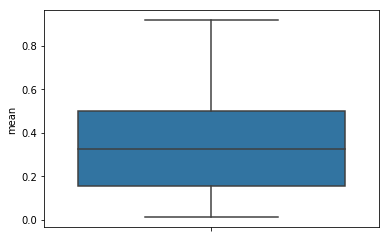

In [ ]:
sns.boxplot(voting_test['mean'], orient= 'v')

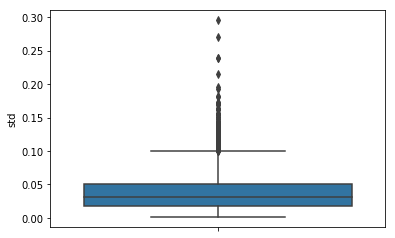

In [ ]:
sns.boxplot(voting_test['std'], orient= 'v')

In [ ]:
def scores(df, label= 'LABEL', pred= 'soft_pred'):
    y_test= df[label]
    predictions= df[pred]

    #print('\n\033[1mtrain accuracy TP+TN/tot is {} \033[0m'.format(round(accuracy_score(y_train, classifier.predict(x_train)),3)))
    print('\033[1mtest accuracy TP+TN/tot is {} \033[0m'.format(round(accuracy_score(y_test, predictions),3)))
    print('\n\033[1mCLASSIFICATION REPORT\033[0m: \n', classification_report(y_test, predictions))
    print('\033[1mCONFUSION MATRIX\033[0m \n', confusion_matrix(y_test, predictions))
    """ROC CURVE SCORES (non esiste per multiclass classification)"""
    print('\n\033[1mROC test is {b}'.format(b= roc_auc_score(y_test, predictions, average="weighted")))
    print('\n\033[1mF1 test is {b} \033[0m'.format(b= round(f1_score(y_test, predictions, average='weighted'),3)))

In [ ]:
np.average(voting_test.iloc[:2, :3], axis=1)

array([0.66876922, 0.80269091])

In [ ]:
voting_test['soft_pred']= voting_test['mean'].apply(lambda x: 2 if x>0.5 else 0)

voting_test['weighted_pred']= np.average(voting_test[['rf', 'xgboost', 'NN']], weights= [0.2, 0.4, 0.4], axis=1)
voting_test['weighted_pred']= voting_test['weighted_pred'].apply(lambda x: 2 if x>0.5 else 0)

#voting_test['NN_pred']= voting_test['NN'].apply(lambda x: 2 if x>0.5 else 0)
voting_test.drop('NN_pred', axis=1, inplace=True, errors= 'ignore')

voting_test.head()

,rf,xgboost,NN,mean,std,LABEL,soft_pred,weighted_pred
13706,0.668742,0.698815,0.638750,0.668769,0.024521,0,2,2
8416,0.787474,0.819808,0.800790,0.802691,0.013269,2,2,2
29179,0.085064,0.089089,0.133000,0.102384,0.021711,0,0,0
32713,0.245225,0.232580,0.215064,0.230956,0.012367,0,0,0
38641,0.409878,0.434387,0.228649,0.357638,0.091756,0,0,0


In [ ]:
scores(voting_test, pred='soft_pred')

test accuracy TP+TN/tot is 0.753 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.77      0.88      0.82      3289
           2       0.70      0.51      0.59      1743

    accuracy                           0.75      5032
   macro avg       0.74      0.69      0.71      5032
weighted avg       0.75      0.75      0.74      5032

CONFUSION MATRIX 
 [[2909  380]
 [ 862  881]]

ROC test is 0.6949568678222423

F1 test is 0.742 


In [ ]:
scores(voting_test, pred= 'weighted_pred')

test accuracy TP+TN/tot is 0.753 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.77      0.88      0.82      3289
           2       0.69      0.51      0.59      1743

    accuracy                           0.75      5032
   macro avg       0.73      0.70      0.71      5032
weighted avg       0.75      0.75      0.74      5032

CONFUSION MATRIX 
 [[2899  390]
 [ 855  888]]

ROC test is 0.6954446810392332

F1 test is 0.742 


In [ ]:
thresh= 0.42

voting_test['soft_pred_thresh']= voting_test['mean'].apply(lambda x: 2 if x> thresh else 0)

voting_test['weighted_pred_thres']= voting_test['weighted_pred'].apply(lambda x: 2 if x> thresh else 0)

In [ ]:
scores(voting_test, pred= 'soft_pred_thresh')

test accuracy TP+TN/tot is 0.746 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      3289
           2       0.63      0.65      0.64      1743

    accuracy                           0.75      5032
   macro avg       0.72      0.72      0.72      5032
weighted avg       0.75      0.75      0.75      5032

CONFUSION MATRIX 
 [[2617  672]
 [ 605 1138]]

ROC test is 0.7242899408954936

F1 test is 0.747 


In [ ]:
############################################################################################################################################

In [ ]:
sbagliate_soft= voting_test[voting_test['soft_pred_thresh']!= voting_test['LABEL']]
sbagliate_soft.describe()

,rf,xgboost,NN,mean,std,LABEL,soft_pred,weighted_pred,soft_pred_thresh,weighted_pred_thres
count,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000
mean,0.416795,0.422355,0.421021,0.420057,0.043394,0.947533,0.595145,0.610807,1.052467,0.610807
std,0.150588,0.169279,0.184777,0.160587,0.028713,0.999014,0.914739,0.921517,0.999014,0.921517
min,0.011531,0.013430,0.006178,0.012299,0.000766,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.323743,0.305010,0.286878,0.309471,0.022576,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.423264,0.428829,0.422760,0.428790,0.037509,0.000000,0.000000,0.000000,2.000000,0.000000
75%,0.510309,0.532146,0.544498,0.520373,0.056993,2.000000,2.000000,2.000000,2.000000,2.000000
max,0.845711,0.881802,0.940501,0.885011,0.296101,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
container_25['X_test'][container_25['X_test'].index.isin(sbagliate_soft.index)].shape

(1277, 17)

In [ ]:
container_25['X_test'][container_25['X_test'].index.isin(sbagliate_soft.index)].head()

,Header amount,std_order_intervals,days_til_last_order,durata_nominale_gg,percentage_used,ordini/mese,VMD Code_FINAL_ENC,QMG Code_FINAL_ENC,Global Business line_FINAL_ENC,Geographical Area_FINAL_ENC,Supplier Type Code_FINAL_ENC,Purchase document type_FINAL_ENC,Job type_FINAL_ENC,Professional services flag_FINAL_ENC,Main material group qualification flag_FINAL_ENC,Contract Type_FINAL_ENC,Variant code_FINAL_ENC
13706,0.973393,4.686131,2.177570,1.404301,1.229798,0.129412,0.012570,0.309222,-0.407896,4.556510,0.534960,1.109449,-0.721666,-0.266189,-0.035299,0.709809,0.523984
24557,3.028989,0.000000,0.355140,-0.163441,-0.020274,0.129412,0.224150,1.222605,0.921641,5.515909,9.977662,1.028516,0.293307,0.327939,4.748151,-0.140228,0.043088
34205,-0.252506,0.000000,0.308411,1.415054,1.318543,-0.129412,-0.313667,-0.034903,-0.197985,0.081781,0.785171,0.725721,-0.483117,-0.445900,0.377908,0.548290,-0.431000
42773,-0.025523,-0.072993,-0.214953,-0.660215,-0.218418,-0.258824,-0.181195,0.182575,1.077424,-0.690090,-0.137221,1.049527,-0.296047,0.370118,-0.012644,0.492323,-1.153583
11944,0.537909,0.000000,0.112150,1.406452,1.336138,-0.129412,0.127115,1.095296,0.186052,-0.363526,1.607983,-0.187398,-1.914490,0.092471,-0.848278,1.343291,-0.140460


In [ ]:
####################################################

### Importing probabilities of NN with Categorical Embedding

In [ ]:
preds_embedding= pd.read_pickle('./best_models/predictions/preds_emb_rol25.pk1')
preds_embedding.head(3)

,Preds_embedding,Proba_embedding
13706,1,0.544023
8416,1,0.905139
29179,0,0.241197


In [ ]:
(voting_test.index== preds_embedding.index).sum() #Check ok, stesso indice

5032

In [ ]:
voting_final= voting_test.join(preds_embedding)
voting_final.columns

Index(['rf', 'xgboost', 'NN', 'mean', 'std', 'LABEL', 'soft_pred',
       'weighted_pred', 'soft_pred_thresh', 'weighted_pred_thres',
       'Preds_embedding', 'Proba_embedding'],
      dtype='object')

In [ ]:
voting_final= voting_final[['rf', 'xgboost', 'NN', 'Proba_embedding', 'mean', 'std', 'LABEL', 'soft_pred',
       'weighted_pred', 'soft_pred_thresh', 'weighted_pred_thres', 'Preds_embedding',]]

voting_final['Preds_embedding']= voting_final['Proba_embedding'].apply(lambda x: 2 if x>= 0.5 else 0)

voting_final.head(3)

,rf,xgboost,NN,Proba_embedding,mean,std,LABEL,soft_pred,weighted_pred,soft_pred_thresh,weighted_pred_thres,Preds_embedding
13706,0.668742,0.698815,0.63875,0.544023,0.668769,0.024521,0,2,2,2,2,2
8416,0.787474,0.819808,0.80079,0.905139,0.802691,0.013269,2,2,2,2,2,2
29179,0.085064,0.089089,0.13300,0.241197,0.102384,0.021711,0,0,0,0,0,0


In [ ]:
accuracies= {}
for model in ['rf', 'xgboost', 'NN', 'Proba_embedding']:
  preds_model= voting_final[model].apply(lambda x: 2 if x>= 0.5 else 0)
  accuracies[model]=  (preds_model== voting_final['LABEL']).sum()/len(voting_final)

accuracies

{'NN': 0.7488076311605724,
 'Proba_embedding': 0.746422893481717,
 'rf': 0.7503974562798092,
 'xgboost': 0.75}

In [ ]:
voting_final['mean_with_emb']= voting_final[['rf', 'xgboost', 'NN', 'Proba_embedding']].mean(axis=1)
voting_final['diff_emb_altri']= voting_final['Proba_embedding']- voting_final['mean']


voting_final['soft_pred_emb']= voting_final['mean_with_emb'].apply(lambda x: 2 if x>0.5 else 0)
voting_final.head(2)

,rf,xgboost,NN,Proba_embedding,mean,std,LABEL,soft_pred,weighted_pred,soft_pred_thresh,weighted_pred_thres,Preds_embedding,mean_with_emb,diff_emb_altri,soft_pred_emb
13706,0.668742,0.698815,0.63875,0.544023,0.668769,0.024521,0,2,2,2,2,2,0.637583,-0.124746,2
8416,0.787474,0.819808,0.80079,0.905139,0.802691,0.013269,2,2,2,2,2,2,0.828303,0.102448,2


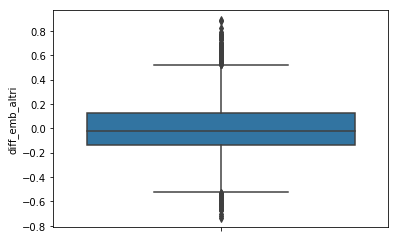

In [ ]:
sns.boxplot(voting_final['diff_emb_altri'], orient= 'v')  #parecchi outliers, vuol dire che embedding predice molto diversamente in quei casi.

In [ ]:
scores(voting_final, pred= 'soft_pred_emb')

test accuracy TP+TN/tot is 0.759 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83      3289
           2       0.70      0.53      0.60      1743

    accuracy                           0.76      5032
   macro avg       0.74      0.70      0.71      5032
weighted avg       0.75      0.76      0.75      5032

CONFUSION MATRIX 
 [[2898  391]
 [ 822  921]]

ROC test is 0.7047590963253614

F1 test is 0.749 


# Intelligent Voting: try to study the error, seeing in which ranges the models go bad. The idea is to use in each range the best model

**Vedo confusion matrix di ognuno e distribuzione di probabilità**

In [ ]:
voting_final.columns
voting_clean= voting_final.drop(['std', 'soft_pred', 'weighted_pred','soft_pred_thresh', 'weighted_pred_thres', 'diff_emb_altri', 'soft_pred_emb' ], axis=1)

for model in ['rf', 'xgboost', 'NN']:
  voting_clean['Preds_' + model]= voting_final[model].apply(lambda x: 2 if x>= 0.5 else 0)

voting_clean.columns

Index(['rf', 'xgboost', 'NN', 'Proba_embedding', 'mean', 'LABEL',
       'Preds_embedding', 'mean_with_emb', 'Preds_rf', 'Preds_xgboost',
       'Preds_NN'],
      dtype='object')

In [ ]:
voting_clean.to_pickle('Voting_clean.pk1')
voting_clean.head()

,rf,xgboost,NN,Proba_embedding,mean,LABEL,Preds_embedding,mean_with_emb,Preds_rf,Preds_xgboost,Preds_NN
13706,0.668742,0.698815,0.638750,0.544023,0.668769,0,2,0.637583,2,2,2
8416,0.787474,0.819808,0.800790,0.905139,0.802691,2,2,0.828303,2,2,2
29179,0.085064,0.089089,0.133000,0.241197,0.102384,0,0,0.137088,0,0,0
32713,0.245225,0.232580,0.215064,0.351386,0.230956,0,0,0.261064,0,0,0
38641,0.409878,0.434387,0.228649,0.122255,0.357638,0,0,0.298792,0,0,0


In [ ]:
""" FP e FN """

fp_fn= {} #ha prima FP poi FN

FP_emb= voting_clean[(voting_clean['LABEL']==0) & (voting_clean['Preds_embedding']==2)]  #Predico 2, positive, ma è 0, negative. FP
FN_emb= voting_clean[(voting_clean['LABEL']==2) & (voting_clean['Preds_embedding']==0)]  #FN

fp_fn['emb']= {'FP': FP_emb, 'FN': FN_emb}

fp_fn= {}
accuracies= {}

for model in ['rf', 'xgboost', 'NN']:
  preds_model= voting_clean[model].apply(lambda x: 2 if x>= 0.5 else 0)
  fp_fn[model]=  {}
  fp_fn[model]['FP']= voting_clean[(voting_clean['LABEL']==0) & (preds_model==2)] #Predico 2, positive, ma è 0, negative, è un False Positive, FP
  fp_fn[model]['FN']= voting_clean[(voting_clean['LABEL']==2) & (preds_model==0)] #FN

  accuracies[model]= len(voting_clean[(voting_clean['LABEL']== preds_model])/ len(voting_clean)

**STUDIO ERRORE EMBEDDING; lì dove sbaglia, gli altri come si comportano?**

In [ ]:
FP_emb['Proba_embedding'].describe()   #predico 2 ma label è 0 

count    528.000000
mean       0.737751
std        0.154944
min        0.500590
25%        0.594529
50%        0.721501
75%        0.884402
max        0.999999
Name: Proba_embedding, dtype: float64

In [ ]:
voting_clean['Proba_embedding'].describe()

count    5032.000000
mean        0.343226
std         0.315486
min         0.000000
25%         0.055215
50%         0.253109
75%         0.589120
max         1.000000
Name: Proba_embedding, dtype: float64

In [ ]:
def title_ticks_ecc(title, xlabel, ylabel, new_fig= True , figsize= (10,6)):
    if new_fig== True:
        plt.figure(figsize=figsize)
        
    plt.title(title, color='red', fontsize= 18, pad= 13)
    plt.xlabel(xlabel, color='red', fontsize= 14)
    plt.ylabel(ylabel, color='red', fontsize= 14)
    plt.xticks(fontsize=12, color='blue')
    plt.yticks(fontsize=12, color='blue')

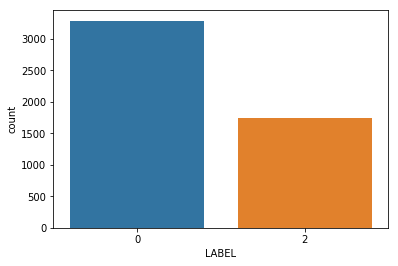

In [ ]:
sns.countplot(voting_clean['LABEL'])  #OCCHIO: DEVI SPECIFICARE CLASS UNBALANCED!!

In [ ]:
voting_clean['xgboost'].describe()

count    5032.000000
mean        0.343941
std         0.223137
min         0.010884
25%         0.144445
50%         0.323910
75%         0.503712
max         0.930898
Name: xgboost, dtype: float64

### **Per Tutti**

In [ ]:
soglie= np.arange(0.05, 1.01, 0.05)

soglie_mag= np.arange(0.5, 0.95, 0.05)
soglie_min= np.arange(0.05, 0.5, 0.05)

**Aggiungi F1**

In [ ]:
def study_threshold_model(sgolie_mag=soglie_mag , soglie_min= soglie_min, model_name= 'rf', preds_model= 'Preds_rf', show_print= False):
  """ model_name: ['rf', 'xgboost', 'NN', 'Proba_embedding']
  preds_model: 'Preds_embedding', 'Preds_rf', 'Preds_xgboost', 'Preds_NN']"""

  fp_nn_mag= []
  fn_nn_mag= []

  fp_nn_min= []
  fn_nn_min= []

  acc_nn_mag=[]
  acc_nn_min=[]

  for soglia in soglie_mag:
    df = voting_clean[voting_clean[model_name]>=soglia]  #### Seleziono solo righe con prob maggiore di threshold e studio FP, FN e Acc su quelle
    
    if show_print: 
      print(len(df))

    fp_nn_mag+= [df[(df['LABEL']==0) & (df[preds_model]==2)].shape[0] / len(df) ]
    fn_nn_mag+= [df[(df['LABEL']==2) & (df[preds_model]==0)].shape[0] / len(df) ]

    acc_nn_mag+= [df[df['LABEL']== df[preds_model]].shape[0] / len(df) ]

  for soglia in soglie_min:
    df_min= voting_clean[voting_clean[model_name]<=soglia]
    fp_nn_min+= [df_min[(df_min['LABEL']==0) & (df_min[preds_model]==2)].shape[0] / len(df_min) ]
    fn_nn_min+= [df_min[(df_min['LABEL']==2) & (df_min[preds_model]==0)].shape[0] / len(df_min) ]

    acc_nn_min+= [df_min[df_min['LABEL']== df_min[preds_model]].shape[0] / len(df_min) ]

  return {'fp_nn_mag': fp_nn_mag, 'fn_nn_mag': fn_nn_mag, 'fp_nn_min': fp_nn_min, 'fn_nn_min': fn_nn_min, 'acc_nn_mag': acc_nn_mag, 'acc_nn_min': acc_nn_min}

In [ ]:
###################################### PER Embedding ##########################################
diz_study_emb= study_threshold_model(model_name= 'Proba_embedding', preds_model= 'Preds_embedding')

###################################### PER NN ##########################################
diz_study_nn= study_threshold_model(model_name= 'NN', preds_model= 'Preds_NN')

###################################### Per Boosting ##########################################
diz_study_boosting= study_threshold_model(model_name= 'xgboost', preds_model= 'Preds_xgboost')

###################################### Per RF ##########################################
diz_study_rf= study_threshold_model(model_name= 'rf', preds_model= 'Preds_rf')

In [ ]:
diz_study_models= dict(zip(['rf', 'xgboost', 'NN', 'Proba_embedding'], [diz_study_emb, diz_study_nn, diz_study_boosting, diz_study_rf]))
diz_study_models.keys()

dict_keys(['rf', 'xgboost', 'NN', 'Proba_embedding'])

In [ ]:
def plot_study_model(diz_study_model, show_single= False, models_to_show=  ['rf', 'xgboost', 'NN', 'Proba_embedding'],
                     in_same_graph= True, n_rows= 2, title= None, figsize= (22, 18)):
  if show_single== True:
    title_ticks_ecc(title,  'Soglie', '')

    plt.plot(np.append(soglie_min, soglie_mag), diz_study_model['fp_nn_min']+diz_study_model['fp_nn_mag'], color='red', label= 'NN FP RATE (predico 2 ma label è 0)')
    plt.plot(np.append(soglie_min, soglie_mag), diz_study_model['fn_nn_min']+ diz_study_model['fn_nn_mag'], color='orange', label= 'NN FN RATE (predico 0 ma label è 2)')

    plt.plot(np.append(soglie_min, soglie_mag), diz_study_model['acc_nn_min']+diz_study_model['acc_nn_mag'], label= 'NN Accuracy', color='grey')
    plt.legend()
    plt.xticks(soglie)
    plt.yticks(np.arange(0,0.99, 0.05))

  else:
    
    diz= dict(zip(models_to_show, [diz_study_emb, diz_study_nn, diz_study_boosting, diz_study_rf]))
    
    n_plots= len(models_to_show)
    n_cols= int(n_plots/n_rows)

    plt.figure(figsize=figsize)

    colori= np.random.choice(colors, n_plots, replace= False)

    i=1
    for key in diz:
      model_name= key
      model= diz[model_name]
      color= colori[i-1] 


      if in_same_graph== False:

        """  per fare i vari step...
        plt.subplot(3,2,1)
        plt.title('FP e FN Rates con Embedding Proba>threshold', color='red', fontsize= 15)
        plt.plot(soglie_mag, fp_emb_mag, color= 'orange', label= 'FP RATE (predico 2 ma label è 0)')
        plt.plot(soglie_mag,fn_emb_mag, color='red', label= 'FN RATE (predico 0 ma label è 2)')

        plt.plot(soglie_mag, acc_emb_mag, label= 'Accuracy', color='black')
        plt.legend()
        plt.xticks(soglie)
        plt.yticks(np.arange(0,0.91, 0.05))
        #plt.ylim(-0.01, 0.35)


        plt.subplot(3,2,3)
        plt.title('FP e FN Rates con Embedding Proba<threshold', color='red', fontsize= 15)
        plt.plot(soglie_min, fp_emb_min, color= 'orange', label= 'FP RATE (predico 2 ma label è 0)')
        plt.plot(soglie_min,fn_emb_min, color='red', label= 'FN RATE (predico 0 ma label è 2)')

        plt.plot(soglie_min, acc_emb_min, label= 'Accuracy', color='black')
        plt.legend()
        plt.xticks(soglie)
        plt.yticks(np.arange(0,0.91, 0.05))
        #plt.ylim(-0.01, 0.35)
        """

        plt.subplot(n_plots,n_cols,i)
        plt.title('Model: {}'.format(model_name), color='red', fontsize= 8)
        plt.plot(np.append(soglie_min, soglie_mag), model['fp_nn_min']+ model['fp_nn_mag'], color='red', label= 'FP RATE (predico 2 ma label è 0)')
        plt.plot(np.append(soglie_min, soglie_mag), model['fn_nn_min']+ model['fn_nn_mag'], color='orange', label= 'FN RATE (predico 0 ma label è 2)')
        plt.plot(np.append(soglie_min, soglie_mag), model['acc_nn_min']+ model['acc_nn_mag'], label= 'Accuracy', color='grey')

        plt.legend()
        plt.xticks(soglie)
        plt.yticks(np.arange(0,1.1, 0.1))

        #plt.ylim(-0.01, 0.35)

      elif in_same_graph== True:

        
        plt.title('All Models performances considering different thresholds', color='red', fontsize= 13)
        plt.plot(np.append(soglie_min, soglie_mag), model['fp_nn_min']+ model['fp_nn_mag'], color= color, label= '{} FP RATE (pred 2, label 0)'.format(model_name))
        plt.plot(np.append(soglie_min, soglie_mag), model['fn_nn_min']+ model['fn_nn_mag'], color= color, label= '{} FN RATE (pred 0, label 2)'.format(model_name))
        plt.plot(np.append(soglie_min, soglie_mag), model['acc_nn_min']+ model['acc_nn_mag'], color= color, label= '{} Accuracy'.format(model_name))

        plt.legend()
        plt.xticks(soglie)
        plt.yticks(np.arange(0,1.1, 0.1))

      i+=1

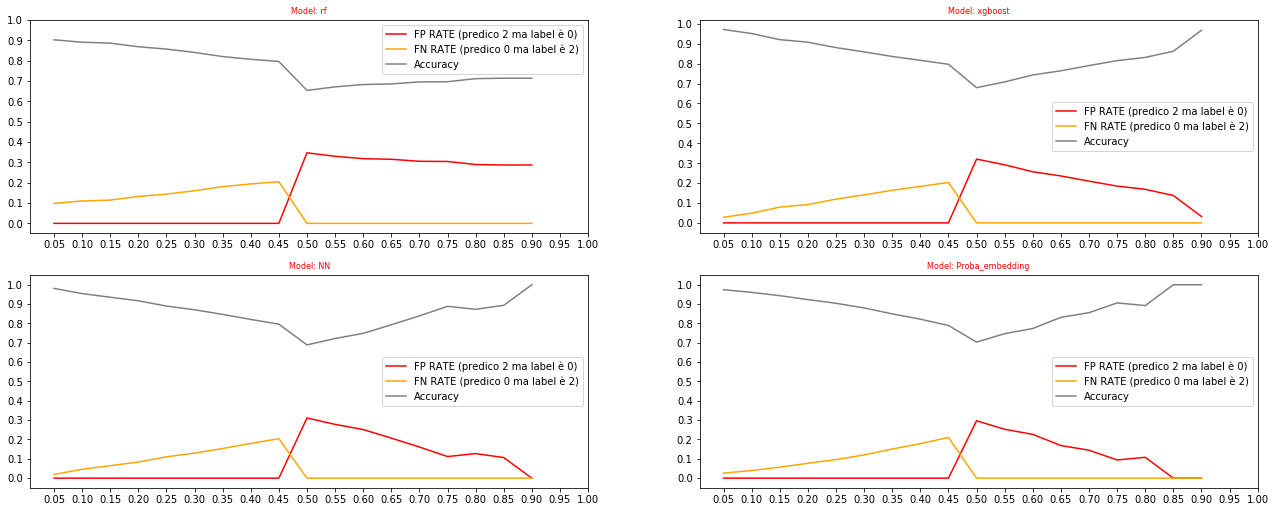

In [ ]:
plot_study_model(diz_study_emb, show_single= False, in_same_graph= False)

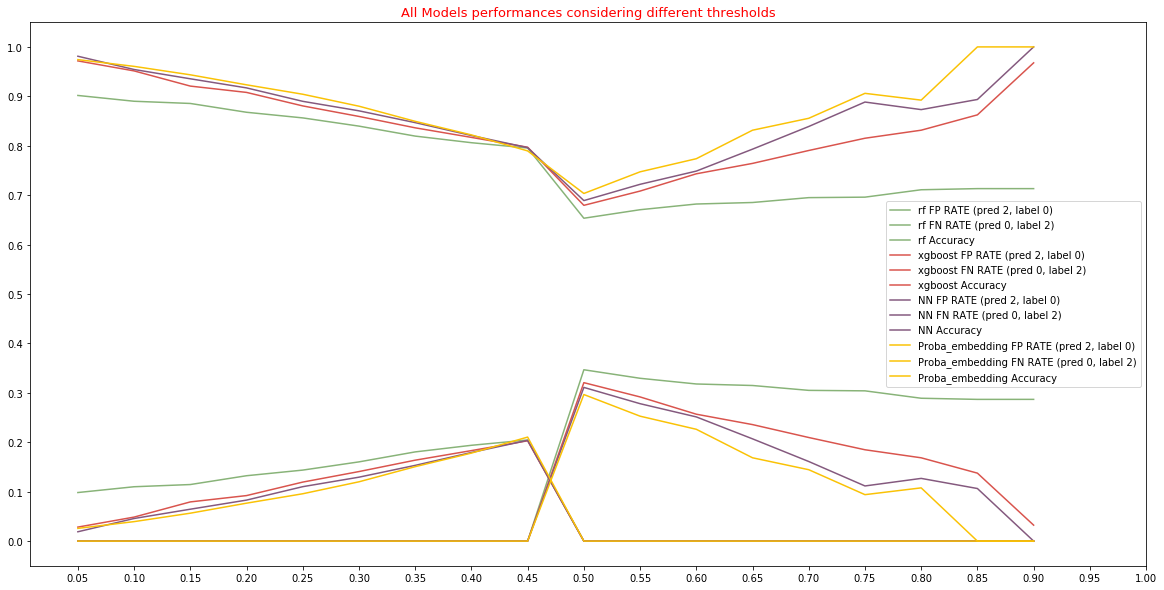

In [ ]:
plot_study_model(diz_study_emb, show_single= False, in_same_graph= True, figsize= (20, 10), )

In [ ]:
accuracies

{'NN': 0.7488076311605724,
 'Proba_embedding': 0.746422893481717,
 'rf': 0.7503974562798092,
 'xgboost': 0.75}

**SPIEGAZIONE: RF è QUELLA CON ACCURACY MIGLIORE. EPPURE COME CONFIDENZA è QUELLA MESSA PEGGIO: COME SI SPIEGA? E DOVUTO AL FATTO CHE SE DA UN LATO QUANDO HA PROB < DI 0.4 PER ES, VA PEGGIO DEGLI ALTRI MODELLI E COSI PER TUTTE LE TRHESHOLD, NON STIAMO CONSIDERANDO IL N° DI SAMPLES CHE HA CLASSIFICATO CON QUELLA PROBABILITA. IN ALTRE PAROLE, PUò AVERE MAGARI TANTISSIMI SAMPLES CON PROB RELATIVE BASSE, CHE VANNO COMUNQUE MEGLIO DI SAMPLES CHE HANNO MAGARI PROB ALTE CON GLI ALTRI MODELLI (ricorda pure che classi sono sbilanciate..)**

In [ ]:
diz_study_models.keys(), diz_study_models['rf'].keys()

(dict_keys(['rf', 'xgboost', 'NN', 'Proba_embedding']),
 dict_keys(['fp_nn_mag', 'fn_nn_mag', 'fp_nn_min', 'fn_nn_min', 'acc_nn_mag', 'acc_nn_min']))

### Interpolazione: prendo il massimo dell'accuratezza di ogni curva

In [ ]:
varying_accuracies= pd.DataFrame()

for model in diz_study_models:
  varying_acc=  diz_study_models[model]['acc_nn_min']+ diz_study_models[model]['acc_nn_mag']
  varying_accuracies[model]= varying_acc

varying_accuracies= varying_accuracies.T
varying_accuracies.columns= [round(soglia, 2) for soglia in np.append(soglie_min, soglie_mag)]

varying_accuracies

,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9
rf,0.901763,0.890030,0.885570,0.867739,0.856343,0.839709,0.819524,0.806158,0.795414,0.653316,0.670554,0.682081,0.685150,0.695005,0.695971,0.710949,0.713249,0.713217
xgboost,0.971698,0.951426,0.920718,0.907918,0.880611,0.859299,0.836259,0.816892,0.797021,0.679401,0.708295,0.743227,0.764264,0.790393,0.815182,0.831461,0.862500,0.967742
NN,0.981132,0.954286,0.935484,0.917064,0.889881,0.870664,0.846783,0.820699,0.796171,0.689010,0.721946,0.748711,0.793103,0.838961,0.888430,0.873134,0.893617,1.000000
Proba_embedding,0.974286,0.960619,0.943548,0.923282,0.904227,0.880018,0.849393,0.821927,0.789564,0.703425,0.747228,0.773756,0.831435,0.855556,0.906040,0.892308,1.000000,1.000000


In [ ]:
varying_accuracies.max().head()

0.05    0.981132
0.10    0.960619
0.15    0.943548
0.20    0.923282
0.25    0.904227
dtype: float64

In [ ]:
varying_accuracies.idxmax().head()

0.05                 NN
0.10    Proba_embedding
0.15    Proba_embedding
0.20    Proba_embedding
0.25    Proba_embedding
dtype: object

In [ ]:
varying_accuracies.idxmax()

0.05                 NN
0.10    Proba_embedding
0.15    Proba_embedding
0.20    Proba_embedding
0.25    Proba_embedding
0.30    Proba_embedding
0.35    Proba_embedding
0.40    Proba_embedding
0.45            xgboost
0.50    Proba_embedding
0.55    Proba_embedding
0.60    Proba_embedding
0.65    Proba_embedding
0.70    Proba_embedding
0.75    Proba_embedding
0.80    Proba_embedding
0.85    Proba_embedding
0.90                 NN
dtype: object

In [ ]:
def intelligent_voting(row):
  """Generalizzalo in modo parametrico """
  
  if row['NN']<= 0.05:
    #print('NN < 0.05')
    return 0
  else:
    if row['Proba_embedding']<= 0.40:
      #print('emb < 0.4')
      return 0
    else:
      if row['xgboost']<= 0.45:
        #print('xgboost < 0.45')
        return 0
      else:
        if row['Proba_embedding']< 0.5:
          #print('emb < 0.5')
          return 0
        else:
          if 0.5 <= row['Proba_embedding'] < 0.9:
            #print('0.9 > emb >= 0.5')
            return 2
          else:
            if row['NN']>= 0.9:
              #print('NN >= 0.9')
              return 2
            else:
              #print('NESSUNA CONDIZIONE SODDIFSFATTA')  #allora lascio decidere a Embedding
              if row['Proba_embedding']>= 0.5:
              #if row['NN']>= 0.5:
                return 2
              else:
                return 0

In [ ]:
prova= voting_clean.iloc[:3].copy()

prova['Intelligent_voting_accuracy']= prova.apply(lambda row: intelligent_voting(row), axis=1)

In [ ]:
prova

,rf,xgboost,NN,Proba_embedding,mean,LABEL,Preds_embedding,mean_with_emb,Preds_rf,Preds_xgboost,Preds_NN,Intelligent_voting_accuracy
13706,0.668742,0.698815,0.63875,0.544023,0.668769,0,2,0.637583,2,2,2,2
8416,0.787474,0.819808,0.80079,0.905139,0.802691,2,2,0.828303,2,2,2,2
29179,0.085064,0.089089,0.13300,0.241197,0.102384,0,0,0.137088,0,0,0,0


In [ ]:
voting_clean['Intelligent_voting_accuracy']= voting_clean.apply(lambda row: intelligent_voting(row), axis=1)

voting_clean.head()

,rf,xgboost,NN,Proba_embedding,mean,LABEL,Preds_embedding,mean_with_emb,Preds_rf,Preds_xgboost,Preds_NN,Intelligent_voting_accuracy
13706,0.668742,0.698815,0.638750,0.544023,0.668769,0,2,0.637583,2,2,2,2
8416,0.787474,0.819808,0.800790,0.905139,0.802691,2,2,0.828303,2,2,2,2
29179,0.085064,0.089089,0.133000,0.241197,0.102384,0,0,0.137088,0,0,0,0
32713,0.245225,0.232580,0.215064,0.351386,0.230956,0,0,0.261064,0,0,0,0
38641,0.409878,0.434387,0.228649,0.122255,0.357638,0,0,0.298792,0,0,0,0


In [ ]:
voting_clean['Intelligent_voting_accuracy'].isna().sum()

0

### Vediamo Accuracy con Voting Intelligente

In [ ]:
accuracies

{'NN': 0.7488076311605724,
 'Proba_embedding': 0.746422893481717,
 'rf': 0.7503974562798092,
 'xgboost': 0.75}

In [ ]:
acc_intelligent= voting_clean[voting_clean['LABEL']== voting_clean['Intelligent_voting_accuracy']].shape[0] / voting_clean.shape[0]

acc_intelligent

0.7503974562798092

In [ ]:
voting_clean[voting_clean['Preds_rf']!= voting_clean['Intelligent_voting_accuracy']].shape[0]

562

In [ ]:
voting_clean[voting_clean['LABEL']== voting_clean['Preds_rf']].shape[0]

3776

(0, 4000)

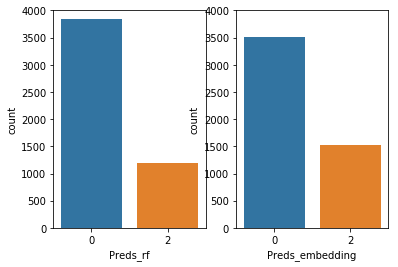

In [ ]:
plt.subplot(1,2,1)   ## COME INTUITO PRIMA, EMBEDDING HA PIU CONFIDENZA....MA RF PREDICE MOLTI PIU 0 E CLASSI SONO PURE SBILANCIATE...!
sns.countplot(voting_clean['Preds_rf'])
plt.ylim(0,4000)
plt.subplot(1,2,2)
sns.countplot(voting_clean['Preds_embedding'])
plt.ylim(0,4000)